# CLASSIFICATION PROBLEM
 
In the previious section we talked about regression which deals with quatitative target variable answering
questions such as how much? or how many?. Regression problems include predicting the price of a house, the age of students and  the salary of an employee. 


$\textbf{In practice, we are more often interested in making categorical assignments: asking not how much? but which one (boy or girl)?}$. We consider a problem to be a classification problem when dealing with qualitative (categorical) target variable with the aim of assigning an input described by vector x to one of the n discrete categories (class) $C_{i}$  where $i = 1,2 \cdots,n$.


A classifier is a map $f(x) \rightarrow C_{i}$


There are numerous classification methods that can be used to predict categorical outcomes, including logistic regression,
support vector machines (SVM) ,decision trees and neural networks

# Logistic regression


The simplest classification problems involves only two classes which are usually lablled $\textbf{1}$for positive ($y=1|x$) and  $\textbf{O}$ for negatice class ($y=0|x$). Classification problems which involving only two categories are often called $\textbf{binary classification}$.


$\textbf{Logistic regression}$ is a probabilistic binary classifier which estimates, for each data point, the conditional probability that it belongs to one of the class.

This can be used to classify an observation into one of two classes (like ‘positive sentiment’ and ‘negative sentiment’, perished and survived, yes and no), from a set of continuous or categorical predictor variables. By choosing a threshold value, we classified output with probability greater than the threshold as one class usually the class labelled $\textbf{1}$ and values below the threshold as belonging to the other class labeled $\textbf{0}$. 

Recall from linear regression
$$\hat y= w^{T}x+b $$

here we are interested in asking the question "what is the probability that given an input vector x the predicted class will be a positive class" so instead of outputting values from the linear model we will modify the output by running the linear function through a sigmoid activation function $\sigma$ to output values with the range of [1,2]

$\hat y$ is then defined to be
$$ \hat{y} =\sigma(\boldsymbol{w}^T \boldsymbol{x} + b). $$
where
$$\boldsymbol{\sigma(z)}=\frac{1}{1+\exp(-z)} $$ and  z is linear function consisting of the input data and their associated
weights and biases. Thus
 $$z=\sum_{i=1}^{n}W_{i}^{T}X_{i} +b_{i}$$






Logistic regression classifies an input by learning from a training set. The model uses the learned weights and biases from the training data, to make a classification on newly unseen but similar instance or example. Each weight $w_{i}$ is a real number, and is associated with one of the input features $x_{i}$. 

$\bullet$We can generalize linear regression to Binary classification by replacing the Gaussian distribution for y with a Bernoulli distribution since the response is binary, $y \in \{0,1 \}$. where


$$ P(y|x,w)=Ber(y|\mu(x)) $$ where $\mu(x)=E[y|x]=P(y=1|X)$
$$\hat y=\mu(x)=\frac{1}{1+\exp(-z)} $$

where x is an input data ,$p(y = 1|x)$ is the probability that the input data belong to class 1 and $p(y = 0|x)=1-p(y = 1|x)$  belonging to the class labelled $0$




The function has a lower bound of zero and an upper bound of 1 and hence the function output values within the
range of $[0,1]$. Logistic sigmoid function is defined as


Using maximum likelihood principle,  for a dataset of $(x_{i},y_{i})$ where $y_{i} \in \{0,1\}$
the likelihood function can be written as



$$P(y|x,w)=\prod_{i}^{n} \hat y^{y_{i}} (1-\hat y)^{1-y_{i}}) $$



In [1]:
from mxnet import np,npx,autograd,nd
import d2l
import random
import math
import matplotlib.pyplot as plt
import pandas as pd
from mxnet.gluon import nn
import mxnet
%matplotlib inline
npx.set_np()

C:\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
inputs=np.arange(5)
m=nn.Activation('sigmoid')
m(inputs)

array([0.5       , 0.7310586 , 0.880797  , 0.95257413, 0.98201376])

In [3]:
def sigmoid(z):
    return 1/(1+np.exp(-z))
sigmoid(inputs)

array([0.5       , 0.7310586 , 0.880797  , 0.95257413, 0.98201376])

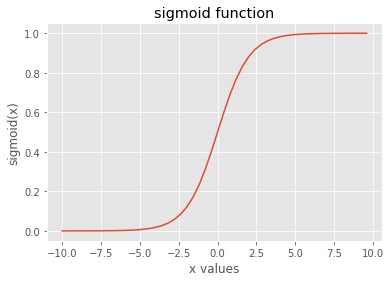

In [4]:
with plt.style.context('ggplot'):
    x=np.arange(-10,10,0.4)
    y=sigmoid(x)
    plt.plot(x,y)
    plt.title('sigmoid function')
    plt.ylabel('sigmoid(x)')
    plt.xlabel('x values')
    plt.show()
    

# LOSS FUNCTION
The loss function measures how close the classifier output $\hat y$ is to the correct output y




We want to train our model such that it learned parameters (weights and biases) maximizes the probability of the correct 
label prediction $p(y|x)$.
Since only two discrete outcomes are invovled, this is a Bernoulli distribution, Using maximum likelihood principle,  for a dataset of $(x_{i},y_{i})$ where $y_{i} \in \{0,1\}$ the likelihood function can be written as



$$P(y|x,w)=\prod_{i}^{n} \hat y^{y_{i}} (1-\hat y)^{1-y_{i}} $$


when we take the log on both side it becomes

$$logP(y|x,w)=log ( \hat y^{y_{i}} (1-\hat y)^{1-y_{i}}) $$
$$logP(y|x,w)=y_{i}log \hat y + (1-y_{i})log(1 -\hat y) $$


which is a log likelihood function that should be maximized. In order to turn this
into loss function that need to be minimized we negate it which then becomes a minimization problem

$$-logP(y|x,w)=-[y_{i}log \hat y + (1-y_{i})log(1 -\hat y)] $$


We defined the binary crossentropy error to
 
 $E(y, \hat y)=-InP(y|x,w)=-[\sum_{i}^{n}y_{i}In \hat y + (1-y_{i})In(1 -\hat y)] $

In [5]:
from mxnet import np,npx,autograd,nd

In [6]:
target = np.zeros(5)

In [7]:
loss=mxnet.gluon.loss.SigmoidBinaryCrossEntropyLoss()
loss(inputs,target)

array([0.6931472, 1.3132617, 2.126928 , 3.0485873, 4.01815  ])

In [8]:
def BCE(y_hat,y):
    los=-(y*np.log(y_hat) + (1-y)*np.log(1-y_hat))
    return los
BCE(sigmoid(inputs),target)

array([0.6931472, 1.3132617, 2.1269276, 3.0485876, 4.0181484])

# IMPLEMENTING LOSGISTIC REGRESSION

In [9]:
from mxnet import np,npx,autograd,nd
import d2l
import matplotlib.pyplot as plt
import pandas as pd
from mxnet.gluon import nn
%matplotlib inline
npx.set_np()

In [10]:
from sklearn.datasets import load_iris
# loading the data
data=load_iris()

In [11]:
# converting the data into a dataframe
train_data=pd.DataFrame(data.data,columns=data.feature_names)
# converting the target variable into a dataframe
y_data=pd.DataFrame(data.target,columns=['species'])
# concatinating both the target and the input features into a single dataframe
train_data[['species']]=y_data[['species']]
train_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
# renaming some columns
train_data=train_data.rename(columns={"sepal length (cm)":"sepal_length","sepal width (cm)":"sepal_width",
                   "petal length (cm)":"petal_length","petal width (cm)":"petal_width"})
print(train_data.shape)
train_data.head(3)

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [13]:
# turning the data into a binary classification problem by dropping the virginica 
#(where does under species=2) rows from the data
train_data=train_data[train_data['species'] <2]
train_data.shape

(100, 5)

In [14]:
x_data=train_data[['sepal_length','sepal_width','petal_length','petal_width']]
y_data=train_data[['species']]
print('shape of the input data',x_data.shape)
print('shape of the target variable',y_data.shape)


shape of the input data (100, 4)
shape of the target variable (100, 1)


In [15]:
x_data=np.array(x_data)
y_data=np.array(y_data)
print('the sheep for the x_data is',x_data.shape)
print('the sheep for the y_data is',y_data.shape)

the sheep for the x_data is (100, 4)
the sheep for the y_data is (100, 1)


# Define our model and initialized the parameters

In [16]:
log_reg=nn.Dense(1)
log_reg.initialize(mxnet.init.Normal(sigma=0.1))

# Instantiate an optimizer

In [22]:
trainer=mxnet.gluon.Trainer(log_reg.collect_params(),'sgd',{'learning_rate':0.1})

# The loss function

In [23]:
loss=mxnet.gluon.loss.SigmoidBinaryCrossEntropyLoss()

# Instantiate a dataloader

In [24]:
data_iter=mxnet.gluon.data.DataLoader(mxnet.gluon.data.ArrayDataset(x_data,y_data),batch_size=30,shuffle=True)

In [25]:
num_epochs = 10 # Number of iterations
batch_size=30
for epoch in range(num_epochs):
    for X,y in data_iter:
        with autograd.record():
            y_hat=log_reg(X)
            los=loss(y_hat,y)# Minibatch loss in X and y
        los.backward() # Compute gradient on l with respect to [w, b]
        trainer.step(batch_size=batch_size) # Update parameters using their gradient
    train_l=loss(log_reg(x_data),y_data)
    print('epoch %d/10, loss %f' % (epoch + 1, train_l.mean().asnumpy()))

epoch 1/10, loss 0.173152
epoch 2/10, loss 0.171775
epoch 3/10, loss 0.170419
epoch 4/10, loss 0.169094
epoch 5/10, loss 0.167784
epoch 6/10, loss 0.166496
epoch 7/10, loss 0.165226
epoch 8/10, loss 0.163978
epoch 9/10, loss 0.162745
epoch 10/10, loss 0.161536
